In [ ]:
!pip install keras

In [ ]:
import pandas as pd
import numpy as np
import sklearn.model_selection as model_selection

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data='/content/drive/My Drive/Colab Notebooks/data/combined.csv'

In [ ]:
df=pd.read_csv(data)

In [ ]:
len(df)

4000

In [ ]:
df=df.drop(['ID','Target'],axis=1)

In [ ]:
X=df[:]
y=[0 for x in range(2000)]+[1 for y in range(2000)]

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.65,test_size=0.35, random_state=101)
print ("X_train: ", X_train)
print ("y_train: ", y_train)
print("X_test: ", X_test)
print ("y_test: ", y_test)

X_train:        Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  ...  f1  f2  f3  f4  f5
2166  -0.743679  -0.448635  -0.823576   0.554261   0.503987  ...   0   0   0   0   1
3403  -0.736664  -0.583761  -0.948207   0.582826   0.640607  ...   1   0   1   0   0
2308  -0.837024  -0.482790  -0.914160   0.592495   0.674555  ...   1   0   1   0   0
3292  -0.573492  -0.461850  -0.967838   0.527127   0.645495  ...   1   0   0   0   0
2810  -0.763873  -0.548033  -0.972949   0.726072   0.725403  ...   2   0   0   0   0
...         ...        ...        ...        ...        ...  ...  ..  ..  ..  ..  ..
1599  -0.573621  -0.375964  -0.697506   0.318243   0.539476  ...   0   0   0   0   0
3910  -0.677524  -0.313311  -0.839104   0.494552   0.582225  ...   0   0   0   0   0
1361  -0.737356  -0.558346  -0.861774   0.567295   0.677595  ...   0   0   0   0   0
1547  -0.962977  -0.361360  -0.909049   0.941109   0.716986  ...   0   0   0   0   0
863   -0.863552  -0.340193  -0.757528   0.814284   0.47

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(773,)))
model.add(layers.Dense(2, activation="sigmoid"))


model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 1548      
Total params: 1,548
Trainable params: 1,548
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [ ]:
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics =['accuracy',])

In [ ]:
from matplotlib import pyplot

Epoch 1/100
82/82 - 0s - loss: 0.0641 - accuracy: 0.9796
Epoch 2/100
82/82 - 0s - loss: 0.0646 - accuracy: 0.9804
Epoch 3/100
82/82 - 0s - loss: 0.0653 - accuracy: 0.9781
Epoch 4/100
82/82 - 0s - loss: 0.0634 - accuracy: 0.9788
Epoch 5/100
82/82 - 0s - loss: 0.0656 - accuracy: 0.9777
Epoch 6/100
82/82 - 0s - loss: 0.0643 - accuracy: 0.9785
Epoch 7/100
82/82 - 0s - loss: 0.0615 - accuracy: 0.9819
Epoch 8/100
82/82 - 0s - loss: 0.0628 - accuracy: 0.9785
Epoch 9/100
82/82 - 0s - loss: 0.0689 - accuracy: 0.9785
Epoch 10/100
82/82 - 0s - loss: 0.0653 - accuracy: 0.9769
Epoch 11/100
82/82 - 0s - loss: 0.0613 - accuracy: 0.9800
Epoch 12/100
82/82 - 0s - loss: 0.0621 - accuracy: 0.9792
Epoch 13/100
82/82 - 0s - loss: 0.0608 - accuracy: 0.9804
Epoch 14/100
82/82 - 0s - loss: 0.0607 - accuracy: 0.9800
Epoch 15/100
82/82 - 0s - loss: 0.0593 - accuracy: 0.9800
Epoch 16/100
82/82 - 0s - loss: 0.0589 - accuracy: 0.9827
Epoch 17/100
82/82 - 0s - loss: 0.0621 - accuracy: 0.9792
Epoch 18/100
82/82 - 0s

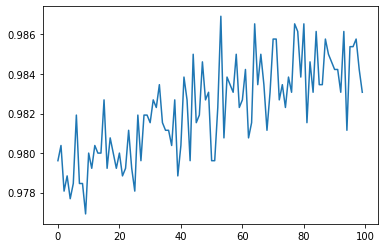

In [ ]:
# train model
history = model.fit(X_train, y_train, epochs=100, verbose=2)
# plot metrics
pyplot.plot(history.history['accuracy'])
pyplot.show()

In [ ]:
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
print(scores)